# Data Analysis

### Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as t

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data Importing

In [54]:
df = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

df = df.dropna()
df_test = df_test.dropna()

## Data Investigation

### Frequency Analysis

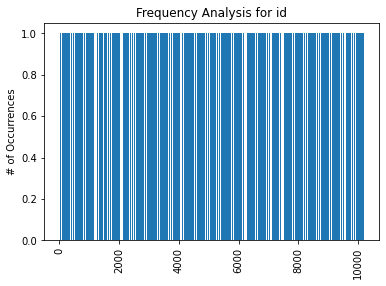

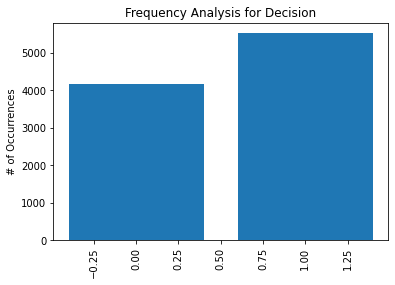

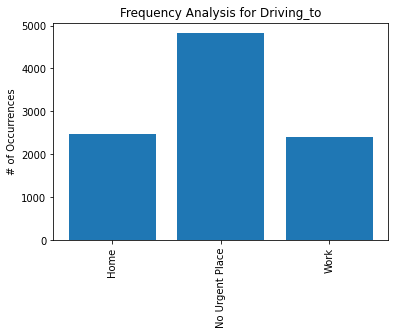

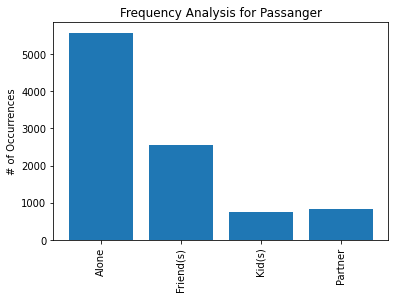

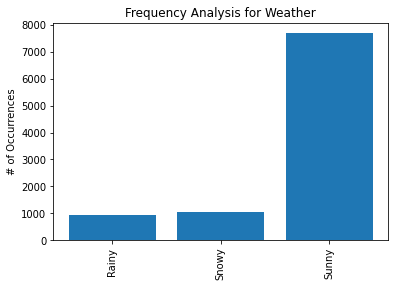

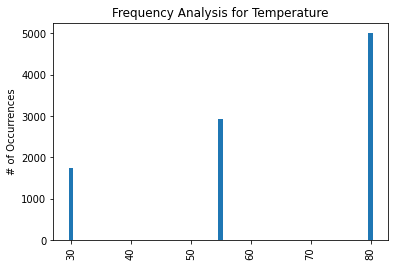

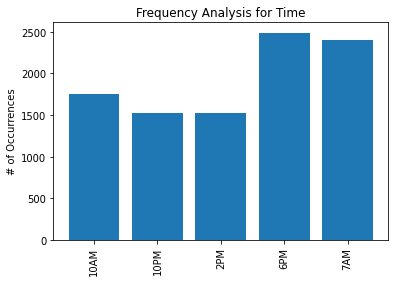

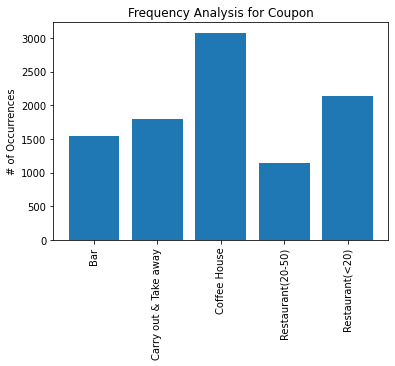

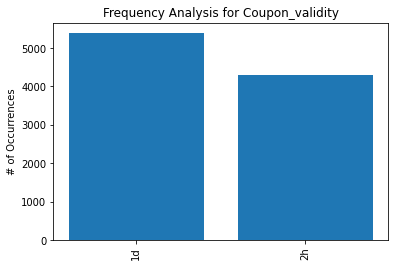

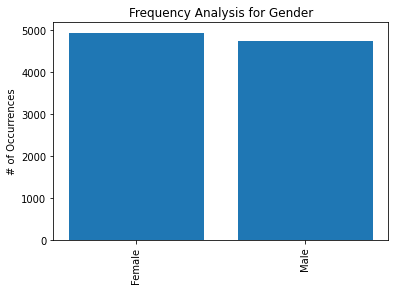

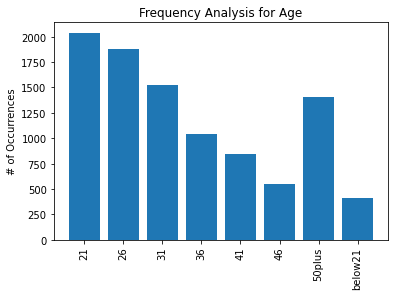

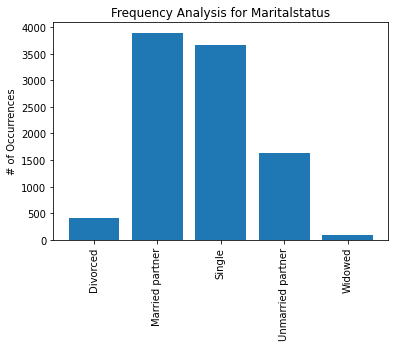

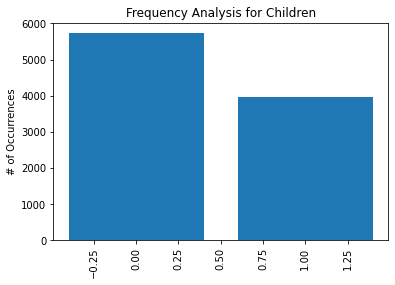

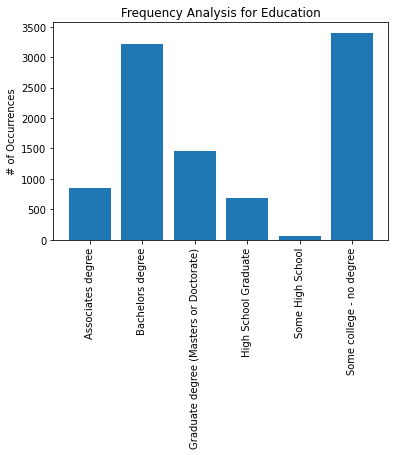

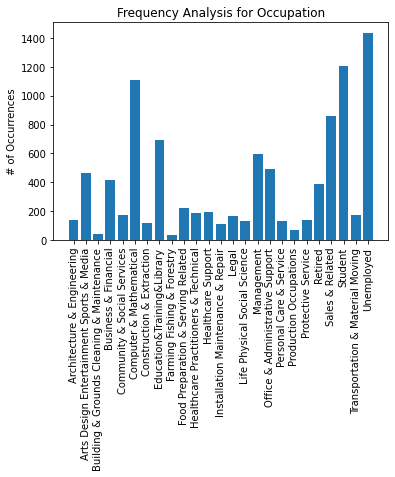

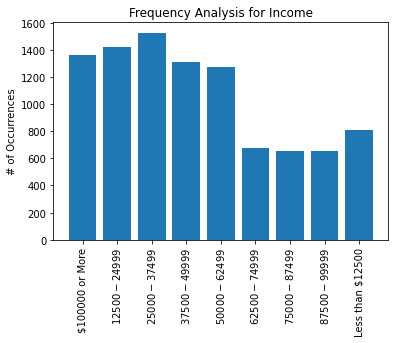

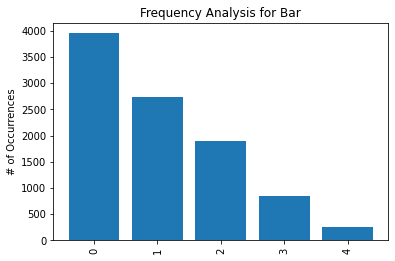

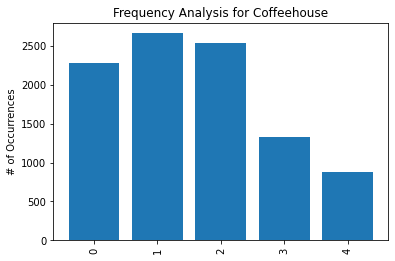

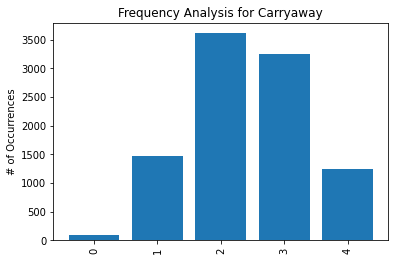

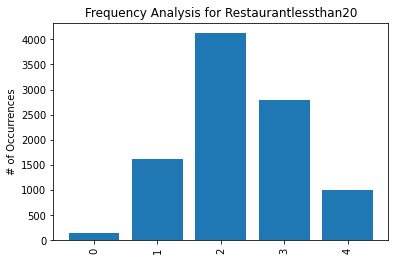

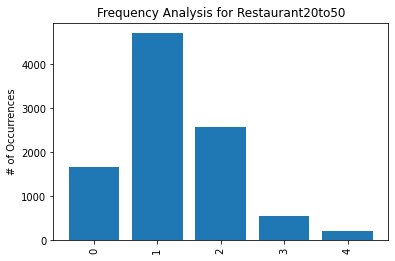

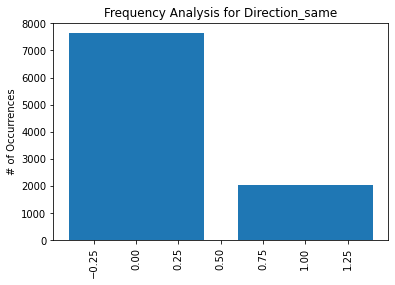

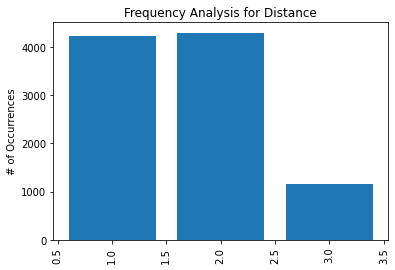

{'id': 1, 'Decision': 1, 'Driving_to': 'No Urgent Place', 'Passanger': 'Alone', 'Weather': 'Sunny', 'Temperature': 80, 'Time': '6PM', 'Coupon': 'Coffee House', 'Coupon_validity': '1d', 'Gender': 'Female', 'Age': '21', 'Maritalstatus': 'Married partner', 'Children': 0, 'Education': 'Some college - no degree', 'Occupation': 'Unemployed', 'Income': '$25000 - $37499', 'Bar': 0.0, 'Coffeehouse': 1.0, 'Carryaway': 2.0, 'Restaurantlessthan20': 2.0, 'Restaurant20to50': 1.0, 'Direction_same': 0, 'Distance': 2}


In [74]:
modes = {}

for (field, vals) in df.iteritems():
    unique_items ,counts = np.unique(vals, return_counts=True)
    plt.title("Frequency Analysis for {:}".format(field))
    plt.ylabel("# of Occurrences")
    plt.bar(unique_items, counts)
    plt.xticks(rotation=90)
    modes[field] = unique_items[np.where(counts == np.max(counts))][0]
    plt.savefig('{:}_freqs.png'.format(field))
    plt.show()

print(modes)

### Feature Importance

Coupon                  0.100430
Occupation              0.088634
Income                  0.078424
Coffeehouse             0.070319
Age                     0.066087
Time                    0.055240
Bar                     0.053547
Education               0.053479
Carryaway               0.049564
Restaurantlessthan20    0.046205
Restaurant20to50        0.045906
Distance                0.039659
Maritalstatus           0.037445
Coupon_validity         0.035518
Temperature             0.033557
Passanger               0.032674
Driving_to              0.028072
Gender                  0.024663
Weather                 0.023468
Children                0.019994
Direction_same          0.017115
dtype: float64
['Coupon' 'Occupation' 'Income' 'Coffeehouse' 'Age' 'Time' 'Bar'
 'Education' 'Carryaway' 'Restaurantlessthan20' 'Restaurant20to50'
 'Distance' 'Maritalstatus' 'Coupon_validity' 'Temperature' 'Passanger'
 'Driving_to' 'Gender' 'Weather' 'Children' 'Direction_same']


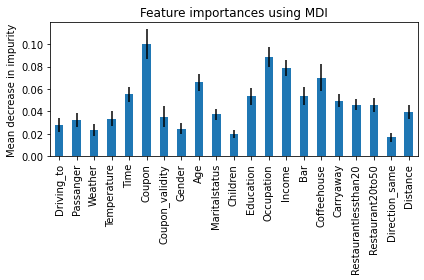

In [75]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

translations = {
    'Driving_to' : ['No Urgent Place', 'Home', 'Work'],
    'Passanger' : ['Alone', 'Partner', 'Kid(s)', 'Friend(s)'],
    'Weather' : ['Sunny', 'Rainy', 'Snowy'],
    'Time' : ['7AM', '10AM', '2PM', '6PM', '10PM'],
    'Coupon' : ['Restaurant(<20)', 'Restaurant(20-50)', 'Carry out & Take away', 'Bar', 'Coffee House'],
    'Coupon_validity' : ['2h', '1d'],
    'Gender' : ['Male', 'Female'],
    'Age' : ['below21', '21', '26', '31', '36', '41', '46', '50plus'],
    'Maritalstatus' : ['Single', 'Divorced', 'Widowed', 'Unmarried partner', 'Married partner'],
    'Education' : ['Some High School', 'High School Graduate', 'Some college - no degree', 'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)'],
    'Occupation' : ['Unemployed', 'Construction & Extraction', 'Arts Design Entertainment Sports & Media', 'Food Preparation & Serving Related', 'Education&Training&Library', 'Sales & Related', 'Computer & Mathematical', 'Student', 'Architecture & Engineering', 'Business & Financial', 'Office & Administrative Support', 'Retired', 'Management', 'Life Physical Social Science', 'Healthcare Support', 'Building & Grounds Cleaning & Maintenance', 'Legal', 'Installation Maintenance & Repair', 'Protective Service', 'Healthcare Practitioners & Technical', 'Community & Social Services', 'Transportation & Material Moving', 'Personal Care & Service', 'Farming Fishing & Forestry', 'Production Occupations'],
    'Income' : ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'],
}

def clean_df(df):
    for (field, vals) in df.iteritems():
        for v_ind in vals.index:
            if pd.isna(vals[v_ind]):
                # NaN condition
                df.at[v_ind, field] = 0
        if field in translations:
            strings = []
            for s_ind in vals.index:
                if vals[s_ind] not in translations[field]:
                    # String that wasn't in training data
                    df.at[s_ind, field] = 0
                    continue
                df.at[s_ind, field] = translations[field].index(vals[s_ind])
    return df

df = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

df = df.dropna()
df_test = df_test.dropna()

# Remove the id column

df = df.loc[:, df.columns != 'id']
df_test = df_test.loc[:, df_test.columns != 'id']

df = clean_df(df)
df_test = clean_df(df_test)

y = df['Decision']
X = df.loc[:, df.columns != 'Decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

rfc_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
rfc_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig('feature_importances.png')

print(rfc_importances.sort_values(ascending = False))
print(np.array(rfc_importances.sort_values(ascending = False).index))